In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bank = pd.read_csv('/content/sample_data/Customer-Churn-Records.csv')

In [ ]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
bank.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
bank.shape

(10000, 18)

In [ ]:
x = bank.iloc[:,[0,1]].values
x

array([[       1, 15634602],
       [       2, 15647311],
       [       3, 15619304],
       ...,
       [    9998, 15584532],
       [    9999, 15682355],
       [   10000, 15628319]])

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

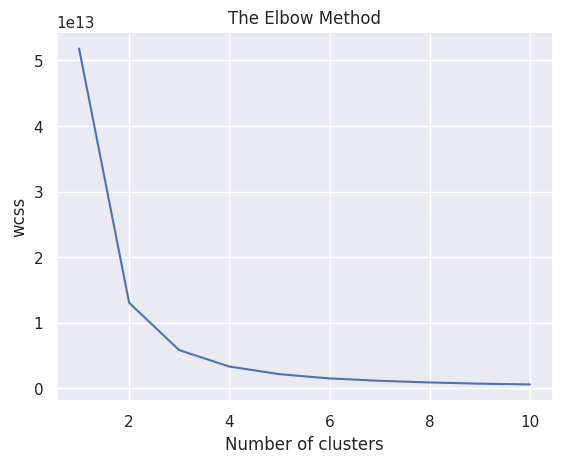

In [ ]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

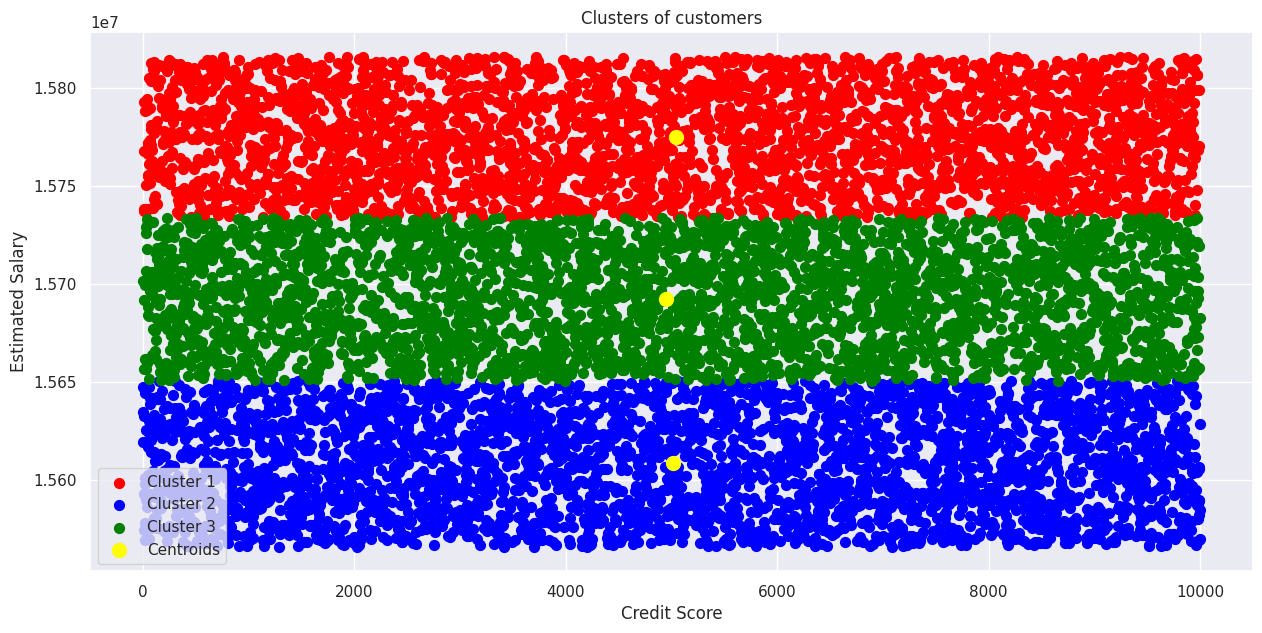

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)
bank['cluster'] = y_kmeans
plt.figure(figsize=(15,7))
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=50,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=50,c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()